# Salary Survey

In [1]:
import pandas as pd
import db
import inspect
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline

In [2]:
data_original=pd.read_sql(sql="select * from _201904 where monthly_salary>0 and monthly_salary<150000", con=db.get_conn())

In [3]:
data_original.shape

(139688, 159)

In [4]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']

In [5]:
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [6]:
data.shape

(139675, 159)

In [7]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

## Salary Distribution

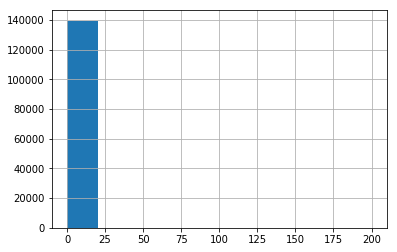

In [8]:
data.monthly_salary.hist()

It does not look like normal distribution.

In [115]:
from scipy import stats

In [116]:
stats.normaltest(data.monthly_salary)

NormaltestResult(statistic=80485.89395778668, pvalue=0.0)

null hypothesis: x comes from a normal distribution
    
p=0

The null hypothesis can be rejected

conclusion: data is not normally distributed.

Zoom in

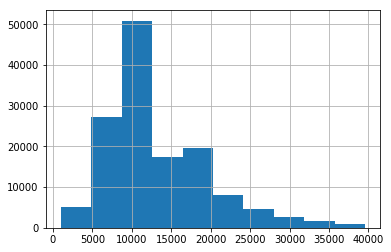

In [117]:
data[data.monthly_salary<40000].monthly_salary.hist()

In [118]:
data.monthly_salary.median()

12500.0

In [119]:
data.monthly_salary.mean()

13755.868728773368

## Role

In [132]:
def get_sub_stats(data, prefix):
    
    features = [feature for feature in data.columns if feature.startswith(prefix)]
    salary_mean=[]
    salary_median=[]
    count=[]
    for feature in features:
        salary_mean.append(data[data[feature]==1].monthly_salary.mean())
        salary_median.append(data[data[feature]==1].monthly_salary.median())
        count.append(data[data[feature]==1].shape[0])
    sub_data=pd.DataFrame()
    sub_data[prefix]=features
    sub_data['salary_mean']=salary_mean
    sub_data['salary_median']=salary_median
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

In [133]:
data_career=get_sub_stats(data,'career')
data_career

,career,salary_mean,salary_median,head_count,percentage
1,career_architect,21490.567677,20000.0,6233,0.038575
0,career_algorithm,20325.387597,18000.0,15781,0.097667
2,career_software_engineer,13755.868729,12500.0,139566,0.863758


有表可知，架构师的工资平均为2.1万，算法工程师为2万，普通程序员为1万4。


In [139]:
career_architect_salary=data[data.career_architect==1].monthly_salary
career_algorithm_salary=data[data.career_algorithm==1].monthly_salary
career_software_engineer_salary=data[data.career_software_engineer==1].monthly_salary
stats.f_oneway(career_algorithm_salary, career_software_engineer_salary)

F_onewayResult(statistic=9378.448428344665, pvalue=0.0)

In [140]:
stats.f_oneway(career_architect_salary, career_algorithm_salary)

F_onewayResult(statistic=49.63271312626023, pvalue=1.908616793279803e-12)

统计表面，架构师，算法工程师，普通程序员之间的平均工资差异是显著的。

## Where are the Developers

In [71]:
data_city=get_sub_stats(data,'city')
data_city

,city,salary,head_count,percentage
0,city_beijing,17453.108346,13823,0.099043
17,city_shanghai,16626.365819,25888,0.185489
19,city_shenzhen,15631.343242,20757,0.148725
9,city_hangzhou,14976.923667,8690,0.062264
8,city_guangzhou,13031.734825,17068,0.122293
14,city_nanjing,12874.243172,7091,0.050808
3,city_chengdu,11895.973250,7028,0.050356
6,city_dongguan,11352.660335,1632,0.011693
22,city_xian,11075.391338,3833,0.027464
21,city_wuhan,11074.196462,8027,0.057514


程序员收入最高的城市分别为：北京，上海，深圳，杭州，广州，南京，成都，东莞等。

In [52]:
data_city.sort_values(by='head_count', ascending=False)

,city,salary,head_count,percentage
17,city_shanghai,16626.365819,25888,0.185489
19,city_shenzhen,15631.343242,20757,0.148725
8,city_guangzhou,13031.734825,17068,0.122293
0,city_beijing,17453.108346,13823,0.099043
9,city_hangzhou,14976.923667,8690,0.062264
21,city_wuhan,11074.196462,8027,0.057514
14,city_nanjing,12874.243172,7091,0.050808
3,city_chengdu,11895.973250,7028,0.050356
22,city_xian,11075.391338,3833,0.027464
2,city_changsha,10847.045816,3354,0.024032


In [56]:
first_tier_percentage=data_city[data_city.city.isin(['city_beijing','city_shanghai','city_guangzhou','city_shenzhen'])].percentage.sum()
print('四个一线城市的程序员就业机会占{0}座城市的{1:.2%}'.format(data_city.shape[0],first_tier_percentage))

四个一线城市的程序员就业机会占24座城市的55.56%


由此可见，程序员向一线城市集中的趋势十分明显。

按照程序员容量，重新划分一二三线城市：

一线：北京，上海，广州，深圳

二线：杭州，武汉，南京，成都

三线：西安，长沙，合肥，大连，重庆，郑州，福州，东莞，宁波，济南，沈阳，青岛，天津，昆明。

四线：哈尔滨，长春等

五线：等等等

## Databases Popularity
### Database

In [59]:
data_db=get_sub_stats(data,'db')
data_db

,db,salary,head_count,percentage
17,db_Netezza,27300.000000,5,0.000045
11,db_Ingres,21500.000000,5,0.000045
16,db_Neo4j,20033.088235,102,0.000923
4,db_DynamoDB,19197.916667,24,0.000217
1,db_CouchBase,18709.459459,37,0.000335
9,db_Hbase,18531.896909,3214,0.029089
5,db_Elasticsearch,18008.434764,1561,0.014128
2,db_CouchDB,17904.761905,21,0.000190
25,db_Solr,17568.148926,714,0.006462
26,db_Splunk,17482.142857,28,0.000253


数据显示，掌握Netezza，Ingres，Neo4j，DynamoDB，CouchBase等数据库技术，可以带来高收入。

In [61]:
data_db.sort_values(by='head_count', ascending=False)

,db,salary,head_count,percentage
15,db_MySQL,13777.641738,36264,0.328211
18,db_Oracle,12653.985456,28236,0.255553
20,db_Redis,16073.004824,14581,0.131967
23,db_SQL_Server,11694.509873,9977,0.090298
14,db_MongoDB,16451.658177,6282,0.056856
9,db_Hbase,18531.896909,3214,0.029089
3,db_DB2,12639.861919,2752,0.024907
13,db_Memcached,15968.959878,2293,0.020753
19,db_PostgreSQL,14929.289676,1863,0.016861
5,db_Elasticsearch,18008.434764,1561,0.014128


由此可见，MySQL（33%），Oracle（26%），Redis（13%），SQL Server(9%)占据了绝大多数市场份额。

## Programming Languages

In [62]:
data_pl=get_sub_stats(data,'pl')

In [66]:
data_pl.sort_values(by='head_count', ascending=False)

,pl,salary,head_count,percentage
5,pl_java,14155.706303,53327,0.299106
1,pl_cpp,15869.083763,29281,0.164234
6,pl_javascript,12274.682531,27483,0.154149
0,pl_c_sharp,12008.116585,19954,0.111920
14,pl_python,17751.090593,14946,0.083831
3,pl_go,17567.808789,12630,0.070840
13,pl_php,13163.163089,9457,0.053043
10,pl_matlab,17720.568562,2691,0.015094
9,pl_lua,16210.063028,2327,0.013052
18,pl_swift,14246.094609,1515,0.008497


数据显示，java的市场份额是最大的，占了30%。其份额约等于第二和第三位，既C++和javascript，的总和。其他主流语言为javascript，c#，python，go和php。而这七大主流语言中，python和go的工资最高，达到了17000。javascript和c#的工资最低，只有12000。

In [67]:
data_pl

,pl,salary,head_count,percentage
4,pl_haskell,24371.794872,13,0.000073
16,pl_rust,19343.881857,158,0.000886
14,pl_python,17751.090593,14946,0.083831
10,pl_matlab,17720.568562,2691,0.015094
3,pl_go,17567.808789,12630,0.070840
12,pl_perl,17219.907072,1381,0.007746
9,pl_lua,16210.063028,2327,0.013052
15,pl_ruby,16159.683426,716,0.004016
1,pl_cpp,15869.083763,29281,0.164234
8,pl_kotlin,14866.808252,412,0.002311


从工资上面看，haskell的工资遥遥领先，一个月2万3呀！我连忙查了一下，什么是haskell。kaskell是一门函数式functional langugae。我大学里函数式语言考试（F#）还拿了100分呢（一半人都挂了），现在后悔没有搞函数式编程，不知道转行是不是来得及。

In [19]:
get_subset(data_sum, 'company_size_')

company_size_50_150        40202.0
company_size_150_500       30493.0
company_size_50            22544.0
company_size_1000_5000     16753.0
company_size_500_1000      13408.0
company_size_10000          5433.0
company_size_5000_10000     2601.0
dtype: float64

In [25]:
get_mean_salary_by('company_size_')

company_size_10000         19133.420976
company_size_5000_10000    15321.567381
company_size_1000_5000     15247.573198
company_size_500_1000      14714.131745
company_size_150_500       13620.251887
company_size_50_150        12901.782978
company_size_50            12288.195438
dtype: float64

In [20]:
get_subset(data_sum, 'company_type_')

company_type_private               88787.0
company_type_listed                11800.0
company_type_state                  7301.0
company_type_foreign                5378.0
company_type_us_eu                  5113.0
company_type_startup                3079.0
company_type_public_institution      824.0
company_type_non_profit              133.0
company_type_foreign_rep              98.0
company_type_foreign_gov              18.0
dtype: float64

In [26]:
get_mean_salary_by('company_type_')

company_type_us_eu                 16553.452133
company_type_foreign_rep           16158.179012
company_type_listed                14597.330645
company_type_startup               14407.678775
company_type_foreign               13904.301029
company_type_state                 13818.917714
company_type_private               13358.761498
company_type_foreign_gov           13347.222222
company_type_public_institution    13137.405866
company_type_non_profit            10167.386091
dtype: float64

In [21]:
data_industry=get_subset(data_sum, 'industry_')

In [22]:
data_industry

industry_computer      113090.0
industry_trade          10821.0
industry_edu             9779.0
industry_finance         5296.0
industry_medical         4092.0
industry_gov             3330.0
industry_energy          3016.0
industry_realestate      2988.0
industry_ads             2876.0
industry_logistic        2164.0
industry_service         1348.0
dtype: float64

In [27]:
get_mean_salary_by('industry_')

industry_finance       15933.725683
industry_edu           15065.823747
industry_logistic      14341.192681
industry_service       14236.452514
industry_computer      13756.265933
industry_trade         13681.545418
industry_gov           13412.566477
industry_medical       12949.943916
industry_realestate    12855.498612
industry_energy        12729.150934
industry_ads           12514.656120
dtype: float64

In [23]:
get_subset(data_sum, 'experience_')

experience_1_3     40876.0
experience_3_5     37925.0
experience_no      36288.0
experience_5_10    16370.0
experience_10        459.0
dtype: float64

In [28]:
get_mean_salary_by('experience_')

experience_10      29943.149718
experience_5_10    20635.954227
experience_3_5     15021.980430
experience_no      11874.269926
experience_1_3     11328.539647
dtype: float64

## 工资分布

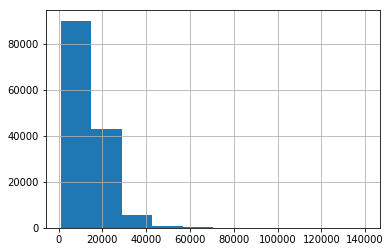

In [85]:
data.monthly_salary.hist()

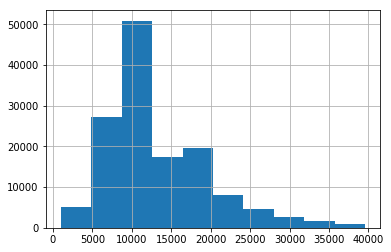

In [86]:
data[data.monthly_salary<40000].monthly_salary.hist()

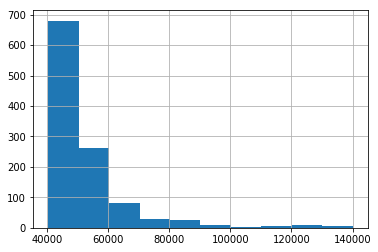

In [89]:
data[data.monthly_salary>40000].monthly_salary.hist()

In [75]:
data.monthly_salary.min()

1000.0

In [76]:
data.monthly_salary.max()

140000.0

In [77]:
data.monthly_salary.median()

12500.0

In [78]:
data.monthly_salary.mean()

13755.868728773368

In [90]:
from scipy import stats

In [91]:
stats.normaltest(data.monthly_salary)

NormaltestResult(statistic=80485.89395778668, pvalue=0.0)

In [92]:
?stats.normaltest

In [95]:
a=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [96]:
stats.normaltest(a)

NormaltestResult(statistic=112.24649953711291, pvalue=4.226514069652413e-25)

null hypothesis: x comes from a normal distribution
p=0
The null hypothesis can be rejected
conclusion: data is not normally distributed.